<a href="https://colab.research.google.com/github/goebalgaebal/TIL/blob/master/%EB%B9%85%EB%8D%B0%EC%9D%B4%ED%84%B0(%EB%94%A5%EB%9F%AC%EB%8B%9D)%20%ED%99%9C%EC%9A%A9%20AI%20%EC%84%A4%EA%B3%84/%EB%94%A5%EB%9F%AC%EB%8B%9D%EC%9D%84%20%EC%9C%84%ED%95%9C%20%EB%B9%85%EB%8D%B0%EC%9D%B4%ED%84%B0%20%EA%B8%B0%EC%B4%88/Python/code2/Day39_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Keras: overfitting 해결하기 - EarlyStopping

Using TensorFlow backend.


11493376/11490434 [==============================] - 0s 0us/step


W0827 00:29:37.904062 139680064710528 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0827 00:29:37.934386 139680064710528 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0827 00:29:37.941057 139680064710528 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0827 00:29:37.975209 139680064710528 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0827 00:29:37.999127 139680064710528 deprecation_wrappe

Train on 700 samples, validate on 300 samples
Epoch 1/1000
700/700 [==============================] - 1s 1ms/step - loss: 2.2576 - acc: 0.1643 - val_loss: 2.2272 - val_acc: 0.1633
Epoch 2/1000
700/700 [==============================] - 0s 124us/step - loss: 2.2072 - acc: 0.1657 - val_loss: 2.1908 - val_acc: 0.1800
Epoch 3/1000
700/700 [==============================] - 0s 127us/step - loss: 2.1729 - acc: 0.1729 - val_loss: 2.1630 - val_acc: 0.1867
Epoch 4/1000
700/700 [==============================] - 0s 132us/step - loss: 2.1440 - acc: 0.1786 - val_loss: 2.1370 - val_acc: 0.1867
Epoch 5/1000
700/700 [==============================] - 0s 123us/step - loss: 2.1175 - acc: 0.1900 - val_loss: 2.1141 - val_acc: 0.1867
Epoch 6/1000
700/700 [==============================] - 0s 128us/step - loss: 2.0939 - acc: 0.2029 - val_loss: 2.0927 - val_acc: 0.2033
Epoch 7/1000
700/700 [==============================] - 0s 119us/step - loss: 2.0718 - acc: 0.2086 - val_loss: 2.0726 - val_acc: 0.2067
Epoc

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.104690). Check your callbacks.
  % delta_t_median)


700/700 [==============================] - 0s 123us/step - loss: 1.5480 - acc: 0.3657 - val_loss: 1.9235 - val_acc: 0.2300
Epoch 300/1000
700/700 [==============================] - 0s 129us/step - loss: 1.5470 - acc: 0.3643 - val_loss: 1.9095 - val_acc: 0.2300
Epoch 301/1000
700/700 [==============================] - 0s 120us/step - loss: 1.5466 - acc: 0.3629 - val_loss: 1.8993 - val_acc: 0.2200
Epoch 302/1000
700/700 [==============================] - 0s 120us/step - loss: 1.5476 - acc: 0.3671 - val_loss: 1.9140 - val_acc: 0.2200
Epoch 303/1000
700/700 [==============================] - 0s 128us/step - loss: 1.5462 - acc: 0.3529 - val_loss: 1.9078 - val_acc: 0.2333
Epoch 304/1000
700/700 [==============================] - 0s 118us/step - loss: 1.5448 - acc: 0.3686 - val_loss: 1.9132 - val_acc: 0.2167
Epoch 305/1000
700/700 [==============================] - 0s 134us/step - loss: 1.5429 - acc: 0.3686 - val_loss: 1.9214 - val_acc: 0.2267
Epoch 306/1000
700/700 [=========================

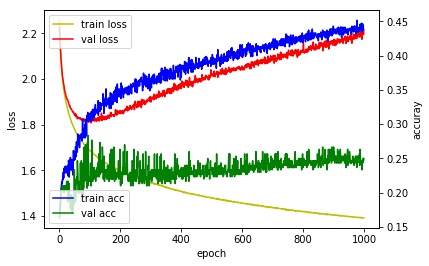

In [1]:
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation
import numpy as np

np.random.seed(3)

# 1. 데이터셋 준비하기

# 훈련셋과 시험셋 로딩
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# 훈련셋과 검증셋 분리
X_val = X_train[50000:]
Y_val = Y_train[50000:]
X_train = X_train[:50000]
Y_train = Y_train[:50000]

X_train = X_train.reshape(50000, 784).astype('float32') / 255.0
X_val = X_val.reshape(10000, 784).astype('float32') / 255.0
X_test = X_test.reshape(10000, 784).astype('float32') / 255.0

# 훈련셋, 검증셋 고르기
train_rand_idxs = np.random.choice(50000, 700)
val_rand_idxs = np.random.choice(10000, 300)

X_train = X_train[train_rand_idxs]
Y_train = Y_train[train_rand_idxs]
X_val = X_val[val_rand_idxs]
Y_val = Y_val[val_rand_idxs]

# 라벨링 전환
Y_train = np_utils.to_categorical(Y_train)
Y_val = np_utils.to_categorical(Y_val)
Y_test = np_utils.to_categorical(Y_test)

# 2. 모델 구성하기
model = Sequential()
model.add(Dense(units=2, input_dim=28*28, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

# 3. 모델 엮기
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# 4. 모델 학습시키기
hist = model.fit(X_train, Y_train, epochs=1000, batch_size=10, validation_data=(X_val, Y_val))

# 5. 모델 학습 과정 표시하기
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

Train on 700 samples, validate on 300 samples
Epoch 1/1000
700/700 [==============================] - 0s 303us/step - loss: 2.2576 - acc: 0.1643 - val_loss: 2.2272 - val_acc: 0.1633
Epoch 2/1000
700/700 [==============================] - 0s 125us/step - loss: 2.2072 - acc: 0.1657 - val_loss: 2.1908 - val_acc: 0.1800
Epoch 3/1000
700/700 [==============================] - 0s 139us/step - loss: 2.1730 - acc: 0.1729 - val_loss: 2.1631 - val_acc: 0.1867
Epoch 4/1000
700/700 [==============================] - 0s 128us/step - loss: 2.1441 - acc: 0.1786 - val_loss: 2.1371 - val_acc: 0.1867
Epoch 5/1000
700/700 [==============================] - 0s 126us/step - loss: 2.1175 - acc: 0.1900 - val_loss: 2.1142 - val_acc: 0.1867
Epoch 6/1000
700/700 [==============================] - 0s 136us/step - loss: 2.0940 - acc: 0.2029 - val_loss: 2.0927 - val_acc: 0.2033
Epoch 7/1000
700/700 [==============================] - 0s 132us/step - loss: 2.0718 - acc: 0.2086 - val_loss: 2.0726 - val_acc: 0.2067
Ep

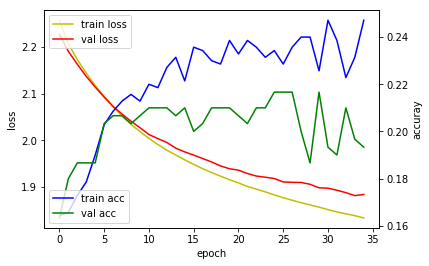

In [2]:
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation
import numpy as np

np.random.seed(3)

# 1. 데이터셋 준비하기

# 훈련셋과 시험셋 로딩
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# 훈련셋과 검증셋 분리
X_val = X_train[50000:]
Y_val = Y_train[50000:]
X_train = X_train[:50000]
Y_train = Y_train[:50000]

X_train = X_train.reshape(50000, 784).astype('float32') / 255.0
X_val = X_val.reshape(10000, 784).astype('float32') / 255.0
X_test = X_test.reshape(10000, 784).astype('float32') / 255.0

# 훈련셋, 검증셋 고르기
train_rand_idxs = np.random.choice(50000, 700)
val_rand_idxs = np.random.choice(10000, 300)

X_train = X_train[train_rand_idxs]
Y_train = Y_train[train_rand_idxs]
X_val = X_val[val_rand_idxs]
Y_val = Y_val[val_rand_idxs]

# 라벨링 전환
Y_train = np_utils.to_categorical(Y_train)
Y_val = np_utils.to_categorical(Y_val)
Y_test = np_utils.to_categorical(Y_test)

# 2. 모델 구성하기
model = Sequential()
model.add(Dense(units=2, input_dim=28*28, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

# 3. 모델 엮기
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# 4. 모델 학습시키기
from keras.callbacks import EarlyStopping
es = EarlyStopping() # 조기 종료 콜백함수 객체
hist = model.fit(X_train, Y_train, 
                 epochs=1000, batch_size=10, 
                 validation_data=(X_val, Y_val),
                 callbacks = [es])

# 5. 모델 학습 과정 표시하기
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

Train on 700 samples, validate on 300 samples
Epoch 1/1000
700/700 [==============================] - 0s 418us/step - loss: 2.2911 - acc: 0.0943 - val_loss: 2.2835 - val_acc: 0.1400
Epoch 2/1000
700/700 [==============================] - 0s 121us/step - loss: 2.2637 - acc: 0.1429 - val_loss: 2.2720 - val_acc: 0.1400
Epoch 3/1000
700/700 [==============================] - 0s 132us/step - loss: 2.2452 - acc: 0.1614 - val_loss: 2.2598 - val_acc: 0.1400
Epoch 4/1000
700/700 [==============================] - 0s 119us/step - loss: 2.2311 - acc: 0.1757 - val_loss: 2.2464 - val_acc: 0.1367
Epoch 5/1000
700/700 [==============================] - 0s 119us/step - loss: 2.2166 - acc: 0.1614 - val_loss: 2.2356 - val_acc: 0.1267
Epoch 6/1000
700/700 [==============================] - 0s 123us/step - loss: 2.2038 - acc: 0.1457 - val_loss: 2.2257 - val_acc: 0.1500
Epoch 7/1000
700/700 [==============================] - 0s 118us/step - loss: 2.1893 - acc: 0.1629 - val_loss: 2.2207 - val_acc: 0.1667
Ep

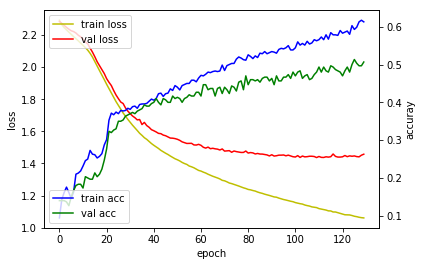

In [5]:
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation
import numpy as np

np.random.seed(3)

# 1. 데이터셋 준비하기

# 훈련셋과 시험셋 로딩
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# 훈련셋과 검증셋 분리
X_val = X_train[50000:]
Y_val = Y_train[50000:]
X_train = X_train[:50000]
Y_train = Y_train[:50000]

X_train = X_train.reshape(50000, 784).astype('float32') / 255.0
X_val = X_val.reshape(10000, 784).astype('float32') / 255.0
X_test = X_test.reshape(10000, 784).astype('float32') / 255.0

# 훈련셋, 검증셋 고르기
train_rand_idxs = np.random.choice(50000, 700)
val_rand_idxs = np.random.choice(10000, 300)

X_train = X_train[train_rand_idxs]
Y_train = Y_train[train_rand_idxs]
X_val = X_val[val_rand_idxs]
Y_val = Y_val[val_rand_idxs]

# 라벨링 전환
Y_train = np_utils.to_categorical(Y_train)
Y_val = np_utils.to_categorical(Y_val)
Y_test = np_utils.to_categorical(Y_test)

# 2. 모델 구성하기
model = Sequential()
model.add(Dense(units=2, input_dim=28*28, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

# 3. 모델 엮기
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# 4. 모델 학습시키기
from keras.callbacks import EarlyStopping
es = EarlyStopping(patience=20) # loss변화가 없어도 20epoch 더 가겠다
hist = model.fit(X_train, Y_train, 
                 epochs=1000, batch_size=10, 
                 validation_data=(X_val, Y_val),
                 callbacks = [es])

# 5. 모델 학습 과정 표시하기
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

# Stacked Rnn 

In [0]:
import tensorflow as tf
import numpy as np
from tensorflow.contrib import rnn

In [0]:
sentence = ("The regret after not doing something is bigger than that of doing something "
            "Ability is decided by one's own effort "
            "The difficulty in life is the choice.")

In [0]:
tf.reset_default_graph()

In [15]:
charSet = list(set(sentence))
charDic = {w: i for i, w in enumerate(charSet)}
charDic

{' ': 20,
 "'": 18,
 '.': 14,
 'A': 19,
 'T': 17,
 'a': 21,
 'b': 3,
 'c': 12,
 'd': 22,
 'e': 0,
 'f': 9,
 'g': 6,
 'h': 16,
 'i': 10,
 'l': 15,
 'm': 11,
 'n': 23,
 'o': 8,
 'r': 1,
 's': 2,
 't': 7,
 'u': 4,
 'w': 5,
 'y': 13}

In [0]:
data_dim = len(charDic) # input_dim = 24차원
num_classes = hidden_size = data_dim
sequence_length = 10
learing_rate = 0.1

In [17]:
len(sentence) # 152글자

152

In [0]:
tf.reset_default_graph()
datax = []
datay = []
for i in range(0, len(sentence)-sequence_length): # (0, 152-10) → (0, 142) 141부터 마지막 학습 시작 
    xstr = sentence[i:i+sequence_length] # 0-9 
    ystr = sentence[i+1:i+sequence_length+1] # 1-10
#     print(i, xstr, "→", ystr)

    x = [charDic[c] for c in xstr]
    y = [charDic[c] for c in ystr]
#     print(x)
#     print(y)
    datax.append(x)
    datay.append(y)
batch_size = len(datax)# 142

In [106]:
x = tf.placeholder(tf.int32, [None, sequence_length])
y = tf.placeholder(tf.int32, [None, sequence_length])

x_one_hot = tf.one_hot(x, num_classes)
print(x_one_hot)

def lstm_cell():
    cell = rnn.BasicLSTMCell(hidden_size)
    return cell

multi_cells = rnn.MultiRNNCell([lstm_cell() for _ in range(2)])
outputs, _states = tf.nn.dynamic_rnn(multi_cells, x_one_hot, dtype=tf.float32)

xforfc = tf.reshape(outputs, [-1, hidden_size])
outputs = tf.contrib.layers.fully_connected(xforfc, num_classes, activation_fn=None)
outputs = tf.reshape(outputs, [batch_size, sequence_length, num_classes])
weights = tf.ones([batch_size, sequence_length])
sequence_loss = tf.contrib.seq2seq.sequence_loss(
    logits = outputs,
    targets=y, 
    weights=weights)
meanLoss = tf.reduce_mean(sequence_loss)
train = tf.train.AdamOptimizer(learning_rate=learing_rate).minimize(meanLoss)

Tensor("one_hot:0", shape=(?, 10, 24), dtype=float32)


In [107]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())
for i in range(500):
    _, cv, res = sess.run([train, meanLoss, outputs], feed_dict={x: datax, y: datay})
    
    for j, result in enumerate(res):
        index = np.argmax(result, axis=1)
        print(i, j, "".join([charSet[t] for t in index]), cv)
        
res = sess.run(outputs, feed_dict={x: datax})
print(res)
for j, result in enumerate(res):
    index = np.argmax(result, 1)
    if j is 0:
        print("".join([charSet[t] for t in index]), end="")
    print(charSet[index[-1]], end="")

0 0 .noniidddd 3.1811142
0 1 giyiiiiddd 3.1811142
0 2 dwiidddddd 3.1811142
0 3 wiiiAddddd 3.1811142
0 4 Aooodddddd 3.1811142
0 5 dddddddddd 3.1811142
0 6 oooddddddd 3.1811142
0 7 Aorrllllrd 3.1811142
0 8 drdweeerdd 3.1811142
0 9 lllwlertdd 3.1811142
0 10 wwwweiildd 3.1811142
0 11 Aweerrdddd 3.1811142
0 12 eeeddddddl 3.1811142
0 13 lrrrdddlll 3.1811142
0 14 driiiillll 3.1811142
0 15 AiiilllllA 3.1811142
0 16 wyglllltAA 3.1811142
0 17 ooddlltAAA 3.1811142
0 18 gdwttwaAaa 3.1811142
0 19 llltttaaaa 3.1811142
0 20 wwwwAAAAAg 3.1811142
0 21 tAAAAAAAgg 3.1811142
0 22 goooooggg. 3.1811142
0 23 booooyy... 3.1811142
0 24 oodyygg.dd 3.1811142
0 25 ohhhg....d 3.1811142
0 26 wwww.....d 3.1811142
0 27 ww.....rdd 3.1811142
0 28 g.....rrdd 3.1811142
0 29 ...rrrrddd 3.1811142
0 30 drrrrrdddy 3.1811142
0 31 llrrooooyw 3.1811142
0 32 gooooooyyA 3.1811142
0 33 booooowwww 3.1811142
0 34 oodoyywwaa 3.1811142
0 35 ohowwwwwaa 3.1811142
0 36 wwwwwwwaaa 3.1811142
0 37 bwwwwwaaod 3.1811142
0 38 wwwwwaaadd 3.1811

# RNN: 스팸 메일 분류
[SMS Spam Collection Dataset](https://www.kaggle.com/uciml/sms-spam-collection-dataset/downloads/sms-spam-collection-dataset.zip/1)

In [30]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [110]:
import pandas as pd
data = pd.read_csv("/content/drive/My Drive/Colab Notebooks/res/spam.csv", encoding="latin1")
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [111]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
v1            5572 non-null object
v2            5572 non-null object
Unnamed: 2    50 non-null object
Unnamed: 3    12 non-null object
Unnamed: 4    6 non-null object
dtypes: object(5)
memory usage: 217.7+ KB


In [0]:
del data["Unnamed: 2"]
del data["Unnamed: 3"]
del data["Unnamed: 4"]

In [113]:
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [0]:
# ham → 0, spam → 1 
data["v1"] = data["v1"].replace(["ham", "spam"], [0, 1])

In [115]:
data.head()

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [116]:
data.isnull().values.any()

False

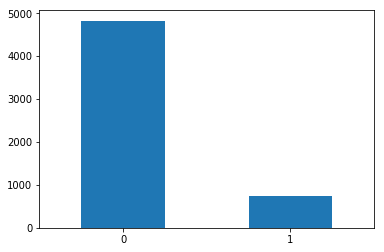

In [117]:
import matplotlib.pyplot as plt
data["v1"].value_counts().plot(kind="bar", rot=0)

In [118]:
ydata = data["v1"]
xdata = data["v2"] 
len(xdata)

5572

## 순서
1. 문장을 단어 단위로 토큰화
2. 단어 토큰 → 정수로 인코딩 


In [0]:
from keras.preprocessing.text import Tokenizer

In [120]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(xdata) # 각 행에 대한 토큰화 수행
sequences = tokenizer.texts_to_sequences(xdata) # 단어를 정수로 저장
word_index = tokenizer.word_index # 함수X, 속성
word_index

{'i': 1,
 'to': 2,
 'you': 3,
 'a': 4,
 'the': 5,
 'u': 6,
 'and': 7,
 'in': 8,
 'is': 9,
 'me': 10,
 'my': 11,
 'for': 12,
 'your': 13,
 'it': 14,
 'of': 15,
 'call': 16,
 'have': 17,
 'on': 18,
 '2': 19,
 'that': 20,
 'now': 21,
 'are': 22,
 'so': 23,
 'but': 24,
 'not': 25,
 'or': 26,
 'do': 27,
 'can': 28,
 'at': 29,
 "i'm": 30,
 'get': 31,
 'be': 32,
 'will': 33,
 'if': 34,
 'ur': 35,
 'with': 36,
 'just': 37,
 'no': 38,
 'we': 39,
 'this': 40,
 'gt': 41,
 '4': 42,
 'lt': 43,
 'up': 44,
 'when': 45,
 'ok': 46,
 'free': 47,
 'from': 48,
 'how': 49,
 'go': 50,
 'all': 51,
 'out': 52,
 'what': 53,
 'know': 54,
 'like': 55,
 'good': 56,
 'then': 57,
 'got': 58,
 'was': 59,
 'come': 60,
 'its': 61,
 'am': 62,
 'time': 63,
 'only': 64,
 'day': 65,
 'love': 66,
 'there': 67,
 'send': 68,
 'he': 69,
 'want': 70,
 'text': 71,
 'as': 72,
 'txt': 73,
 'one': 74,
 'going': 75,
 'by': 76,
 'home': 77,
 "i'll": 78,
 'need': 79,
 'about': 80,
 'r': 81,
 'lor': 82,
 'sorry': 83,
 'stop': 84,
 'st

In [121]:
sequences[:5]

[[50,
  469,
  4410,
  841,
  751,
  657,
  64,
  8,
  1324,
  89,
  121,
  349,
  1325,
  147,
  2987,
  1326,
  67,
  58,
  4411,
  144],
 [46, 336, 1495, 470, 6, 1929],
 [47,
  486,
  8,
  19,
  4,
  796,
  899,
  2,
  178,
  1930,
  1199,
  658,
  1931,
  2320,
  267,
  2321,
  71,
  1930,
  2,
  1932,
  2,
  337,
  486,
  554,
  955,
  73,
  388,
  179,
  659,
  389,
  2988],
 [6, 245, 152, 23, 379, 2989, 6, 140, 154, 57, 152],
 [1018, 1, 98, 107, 69, 487, 2, 956, 69, 1933, 218, 111, 471]]

In [122]:
len(sequences) # 행의 크기

5572

In [0]:
trainData = int(len(sequences)*0.8)
testData = len(sequences) - trainData

In [124]:
print(trainData)
print(testData)

4457
1115


In [125]:
# 메일 제목 단어 최대 길이
max([len(d) for d in sequences])

189

In [126]:
# 메일 제목의 평균 길이
sum(map(len, sequences))/len(sequences)

15.794867193108399

(array([1.390e+02, 1.327e+03, 1.164e+03, 6.900e+02, 3.690e+02, 3.990e+02,
        4.950e+02, 5.130e+02, 2.810e+02, 6.000e+01, 3.900e+01, 1.400e+01,
        1.200e+01, 7.000e+00, 1.700e+01, 7.000e+00, 9.000e+00, 3.000e+00,
        6.000e+00, 2.000e+00, 3.000e+00, 4.000e+00, 0.000e+00, 4.000e+00,
        0.000e+00, 3.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([  0.  ,   3.78,   7.56,  11.34,  15.12,  18.9 ,  22.68,  26.46,
         30.24,  34.02,  37.8 ,  41.58,  45.36,  49.14,  52.92,  56.7 ,
         60.48,  64.26,  68.04,  71.82,  75.6 ,  79.38,  83.16,  86.94,
         90.72,  94.5 ,  98.28, 102.06, 105.84, 109.62, 113.4 , 117.18,
        120.96, 124.74, 128.52, 132.3 , 136.08, 139.86, 143.64, 147.42,
        151.2 , 

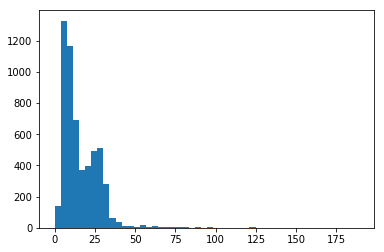

In [127]:
# 메일 제목의 단어의 길이를 히스토그램으로 출력
xdata = sequences
plt.hist([len(s) for s in xdata], bins=50) 
# 대부분 50 미만의 데이터

In [0]:
from keras.layers import *
from keras.models import Sequential
from keras.preprocessing.sequence import pad_sequences

In [0]:
vocab_size = len(word_index) + 1

In [130]:
# 전체 데이터 셋의 길이를 189로 통일
max_len = 189
data = pad_sequences(xdata, maxlen=max_len) # pre padding
data.shape

(5572, 189)

In [131]:
data # 최대 길이보다 짧은 데이터에 빈 자리를 0으로 채움

array([[   0,    0,    0, ...,   58, 4411,  144],
       [   0,    0,    0, ...,  470,    6, 1929],
       [   0,    0,    0, ...,  659,  389, 2988],
       ...,
       [   0,    0,    0, ...,  105,  250, 8919],
       [   0,    0,    0, ...,  200,   12,   47],
       [   0,    0,    0, ...,    2,   61,  268]], dtype=int32)

In [0]:
xtest = data[trainData:] # 뒷쪽 1115개
ytest = ydata[trainData:]

In [0]:
xtrain = data[:trainData] # 앞쪽 4457개
ytrain = ydata[:trainData]

Train on 3565 samples, validate on 892 samples
Epoch 1/5
3565/3565 [==============================] - 2s 633us/step - loss: 0.3076 - acc: 0.8973 - val_loss: 0.2983 - val_acc: 0.8733
Epoch 2/5
3565/3565 [==============================] - 2s 528us/step - loss: 0.0860 - acc: 0.9778 - val_loss: 0.1171 - val_acc: 0.9630
Epoch 3/5
3565/3565 [==============================] - 2s 533us/step - loss: 0.0426 - acc: 0.9893 - val_loss: 0.0962 - val_acc: 0.9709
Epoch 4/5
3565/3565 [==============================] - 2s 528us/step - loss: 0.0269 - acc: 0.9921 - val_loss: 0.0572 - val_acc: 0.9821
Epoch 5/5
1115/1115 [==============================] - 0s 223us/step


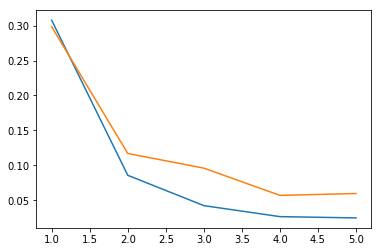

In [147]:
session = tf.Session()

with session.as_default():
    with session.graph.as_default():
        model = Sequential()
        model.add(Embedding(vocab_size, 32)) # 고차원의 데이터를 저차원으로 
        model.add(SimpleRNN(32)) # hidden_size = 32
        model.add(Dense(1, activation="sigmoid"))
        
        model.compile(optimizer="rmsprop", 
              loss="binary_crossentropy", 
              metrics=["acc"])
        
        history = model.fit(xtrain, ytrain, epochs=5, batch_size=60, validation_split=0.2)
        model.evaluate(xtest, ytest)[1]
        

epchs = range(1, len(history.history["acc"])+1)
plt.plot(epchs, history.history["loss"])
plt.plot(epchs, history.history["val_loss"])
plt.show()